In [ ]:
import keras
from PIL import Image
import numpy as np
import glob
from tqdm import tqdm
from PIL import ImageDraw
from skimage.transform import resize
import cv2

In [ ]:
image_list = []
labels = []

for i in tqdm(range(256)):
    scale_factors = []
    filenames = glob.glob('UECFOOD256/' + str(i+1) + '/*.jpg') # all files in the folder that are jpg
    filenames.sort() #lexicographically 
    list_of_numbers = [item.split('\\')[1].split('.')[0] for item in filenames]
    list_of_numbers = list(map(int, list_of_numbers))
    for filename in filenames:
        with Image.open(filename) as im:
            #im = cv2.imread(im)
            im = np.array(im)
            scale_factors += [(224/im.shape[1], 224/im.shape[0])]
            im = cv2.resize(im, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
            image_list.append(im)
    
    
    with open('UECFOOD256/' + str(i+1) + '/bb_info.txt', 'r') as file:
        
        listOfLabels = file.readlines()[1:]
        listOfLabels.sort()
        
        seen = set()
        result = []
        for item in listOfLabels:
            if item.split()[0] not in seen:
                seen.add(item.split()[0])
                result.append(item)

        indices = [item.split()[0] for item in result]                
        
        j = 0
        for line in result:
            temp = list(map(int, line.split()[1:]))
            temp = [temp[0]*scale_factors[j][0], temp[1]*scale_factors[j][1], temp[2]*scale_factors[j][0], temp[3]*scale_factors[j][1]]
            labels.append(temp)
            j+=1
            

In [ ]:
prova = image_list[9].reshape((224,224,3))
prova = Image.fromarray(prova)
prova

In [ ]:
for idx, item in enumerate(image_list): #get rid of jpgs with alpha values
    if item.shape != (224, 224, 3):
        image_list[idx] = image_list[idx][:,:,0:3]

In [ ]:
image_list = np.array(image_list)
#image_list = image_list.astype('float16')
#image_list = image_list / 255.0

In [ ]:
labels = np.array(labels)

In [ ]:
k = 8000
prova = Image.fromarray(image_list[k])
drawing = ImageDraw.Draw(prova)
drawing.rectangle(list(labels[k]))
prova

In [ ]:
print(image_list.shape)
image_list = image_list.reshape((image_list.shape[0],224,224,3))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.activations import relu
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
check = keras.callbacks.ModelCheckpoint('weights.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)
tensorboard = keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=0, batch_size=50, write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None, embeddings_data=None)

# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (1, 1), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (1, 1), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (1, 1), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(4))

model.compile(loss='mse', optimizer='nadam', metrics=['mean_squared_error'])
print(model.summary())

In [58]:
# Fit the model
model.fit(image_list, labels, epochs=100, batch_size=50, verbose=1, callbacks=[check], validation_split=.1)
# Final evaluation of the model
#scores = model.evaluate(X_test, y_test, verbose=0)
#print("Accuracy: %.2f%%" % (scores[1]*100))

28255/28255 [==============================] - 256s 9ms/step - loss: 625.4329 - mean_squared_error: 625.4329 - val_loss: 509.0291 - val_mean_squared_error: 509.0291
Epoch 8/100
 2000/28255 [=>............................] - ETA: 3:52 - loss: 664.6015 - mean_squared_error: 664.6015

KeyboardInterrupt: 

In [145]:
x_test = []
y_test = []

for i in tqdm(range(0,2)):
    scale_factors = []
    filenames = glob.glob('UECFOOD256/' + str(i+1) + '/*.jpg') # all files in the folder that are jpg
    filenames.sort() #lexicographically 
    list_of_numbers = [item.split('\\')[1].split('.')[0] for item in filenames]
    list_of_numbers = list(map(int, list_of_numbers))
    for filename in filenames:
        with Image.open(filename) as im:
            #im = cv2.imread(im)
            im = np.array(im)
            scale_factors += [(300/im.shape[1], 300/im.shape[0])]
            im = cv2.resize(im, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
            x_test.append(im)
    
    
    with open('UECFOOD256/' + str(i+1) + '/bb_info.txt', 'r') as file:
        
        listOfLabels = file.readlines()[1:]
        listOfLabels.sort()
        
        seen = set()
        result = []
        for item in listOfLabels:
            if item.split()[0] not in seen:
                seen.add(item.split()[0])
                result.append(item)

        indices = [item.split()[0] for item in result]                
        
        j = 0
        for line in result:
            temp = list(map(int, line.split()[1:]))
            temp = [temp[0]*scale_factors[j][0], temp[1]*scale_factors[j][1], temp[2]*scale_factors[j][0], temp[3]*scale_factors[j][1]]
            y_test.append(temp)
            j+=1
            
    break

  0%|                                                                                            | 0/2 [00:00<?, ?it/s]


In [146]:
model.load_weights('weights.06-150.60.hdf5')

[[  56.2040596    79.57347107  164.02810669  184.72329712]]


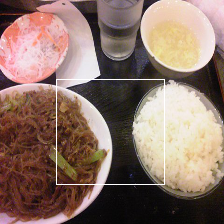

In [172]:
index = 58
prova_result = model.predict(np.array([x_test[index].reshape(224,224,3)]))
prova = Image.fromarray(x_test[index])
drawing = ImageDraw.Draw(prova)
drawing.rectangle(prova_result)
print(prova_result)
prova